<h1 style="background-color: darkviolet; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Customer Segmentation Project</b>
</h1>

In this project, customers are required to be segmented based on the purchasing history obtained from the membership cards of a large mall. This project is less challenging than other projects. After quickly familiarizing ourselves with the dataset, we will perform ***Exploratory Data Analysis (EDA)***. This involves observing the distribution of customers according to various variables and discovering relationships and correlations between these variables. Following this, we will specify the different variables to use for cluster analysis. 

Finally, we will cluster the customers using the ***K-Means Clustering*** method and subsequently label the clusters.


<h1 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Import Libraries</b>
</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimpy import clean_columns

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

<h1 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>EDA</b>
</h1>

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: CustomerID
Number of Unique Values: 200
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 190 more unique values

Column: Gender
Number of Unique Values: 2
Unique Values: ['Male' 'Female']

Column: Age
Number of Unique Values: 51
First 10 Unique Values: [19 21 20 23 31 22 35 64 30 67]
... and 41 more unique values

Column: Annual Income (k$)
Number of Unique Values: 64
First 10 Unique Values: [15 16 17 18 19 20 21 23 24 25]
... and 54 more unique values

Column: Spending Score (1-100)
Number of Unique Values: 84
First 10 Unique Values: [39 81  6 77 40 76 94  3 72 14]
... and 74 more unique values



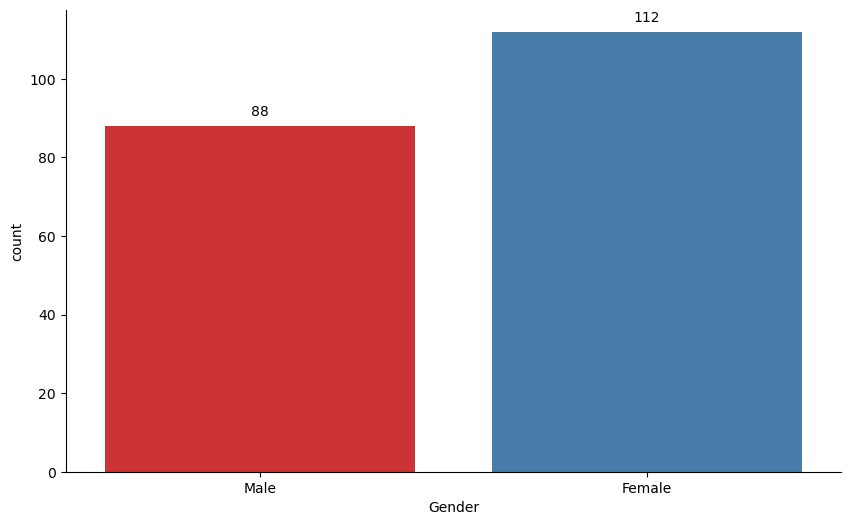

In [5]:
ax = sns.countplot(x=df["Gender"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

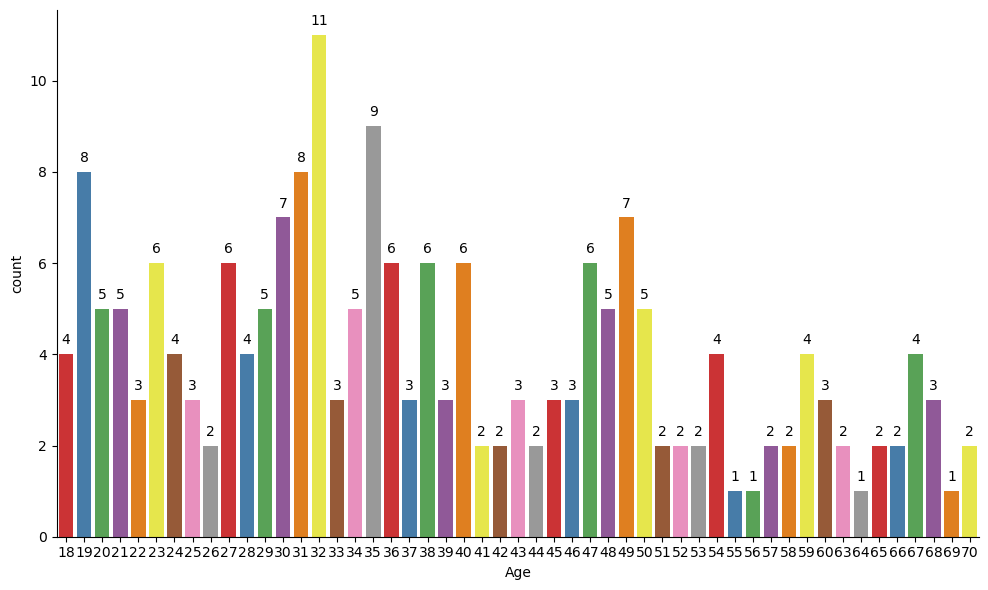

In [6]:
ax = sns.countplot(x=df["Age"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [7]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [8]:
df.info()
# There is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
class_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(class_mapping)

In [10]:
df.Gender.value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [12]:
df = clean_columns(df)

In [13]:
df.rename(columns={'annual_income_k_$': 'annual_income'}, inplace=True)
df.rename(columns={'spending_score_1_100': 'spending_score'}, inplace=True)

## Data Visualization

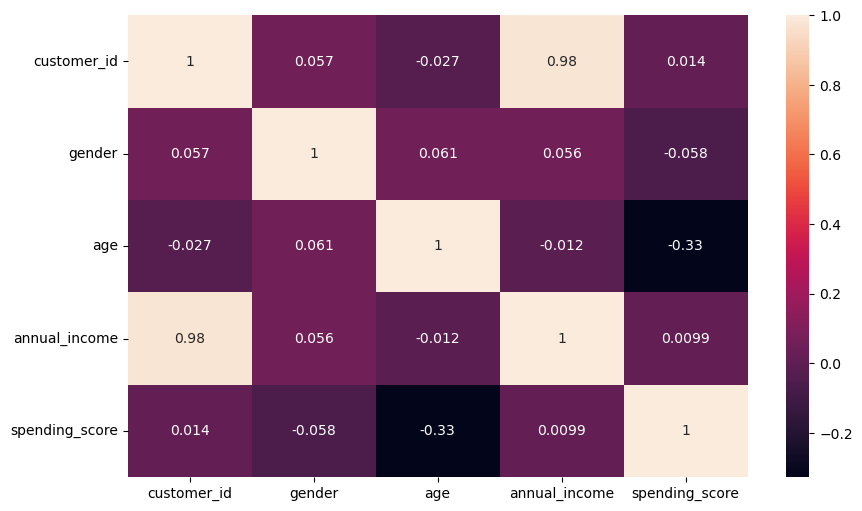

In [14]:
sns.heatmap(data=df.corr(), annot=True);

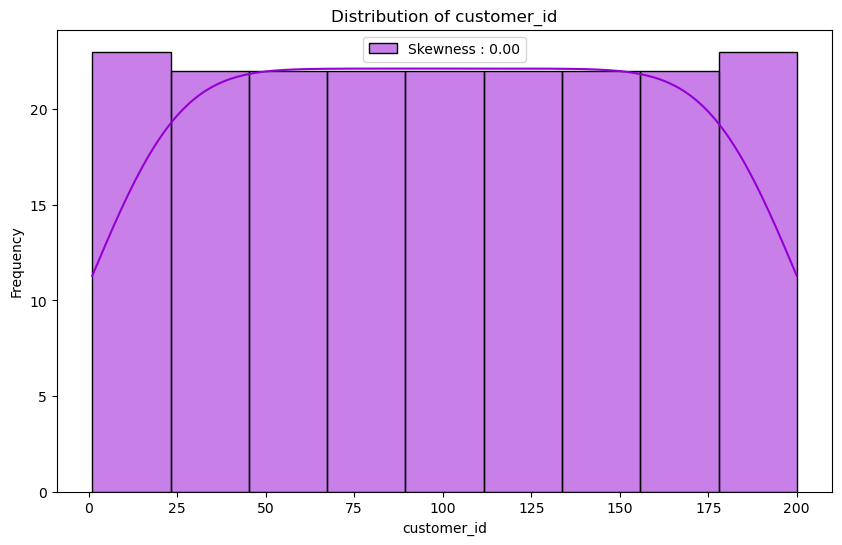

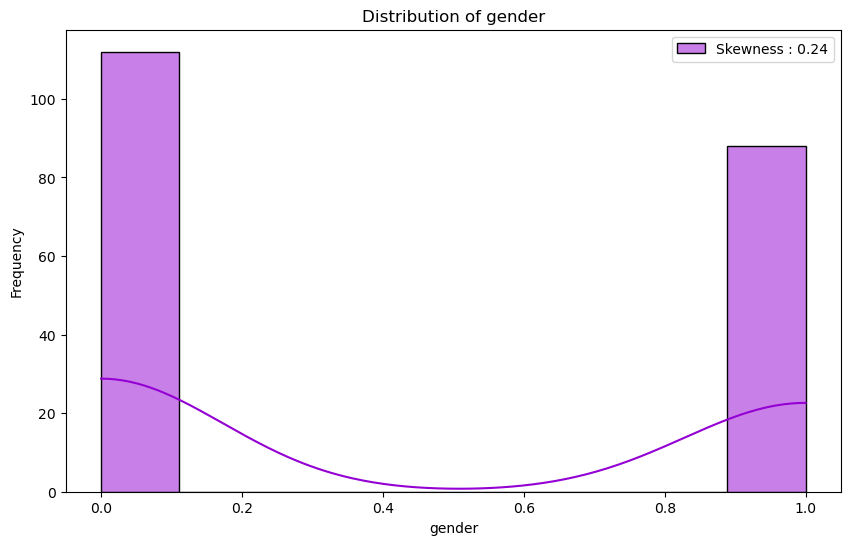

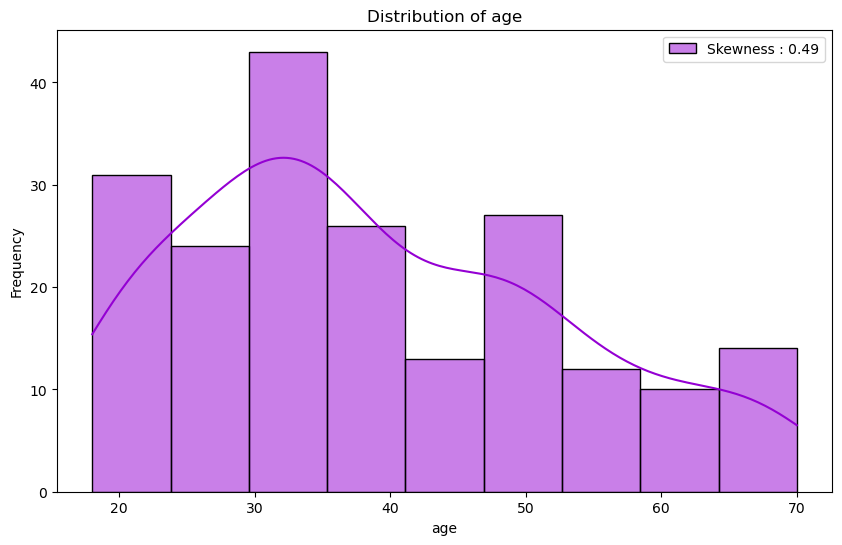

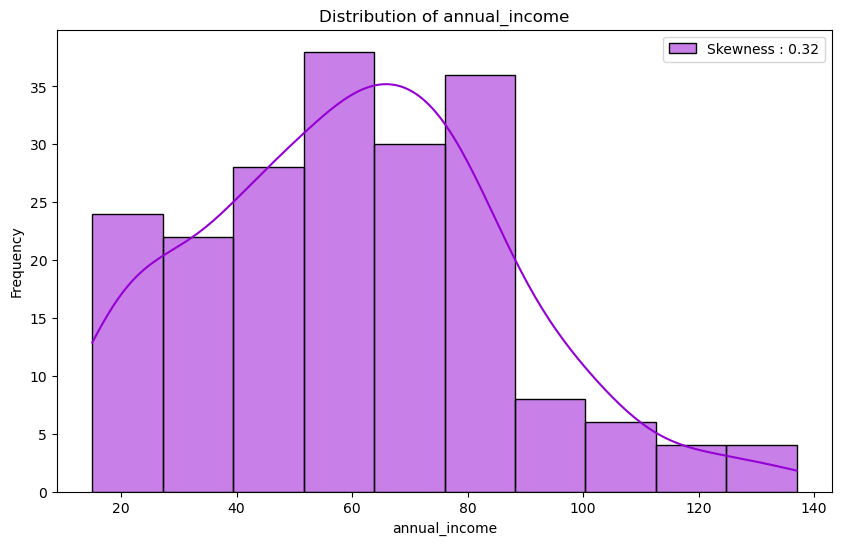

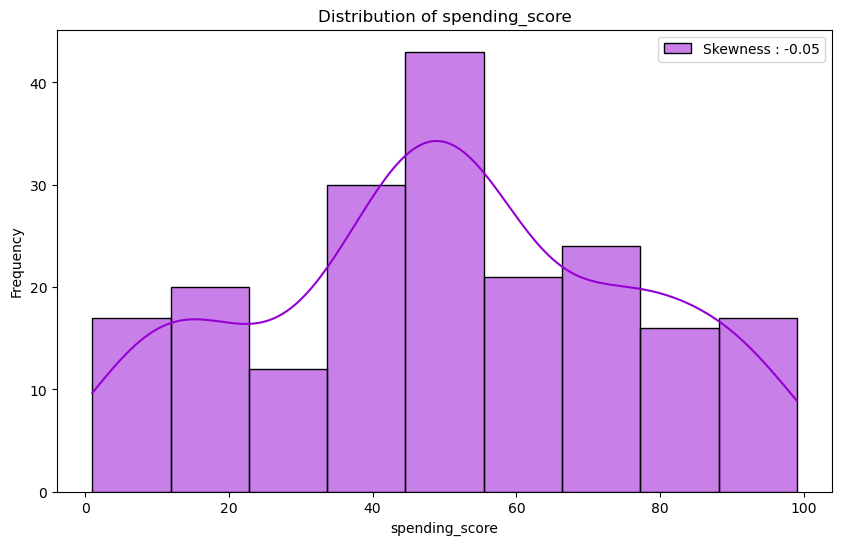

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="darkviolet", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

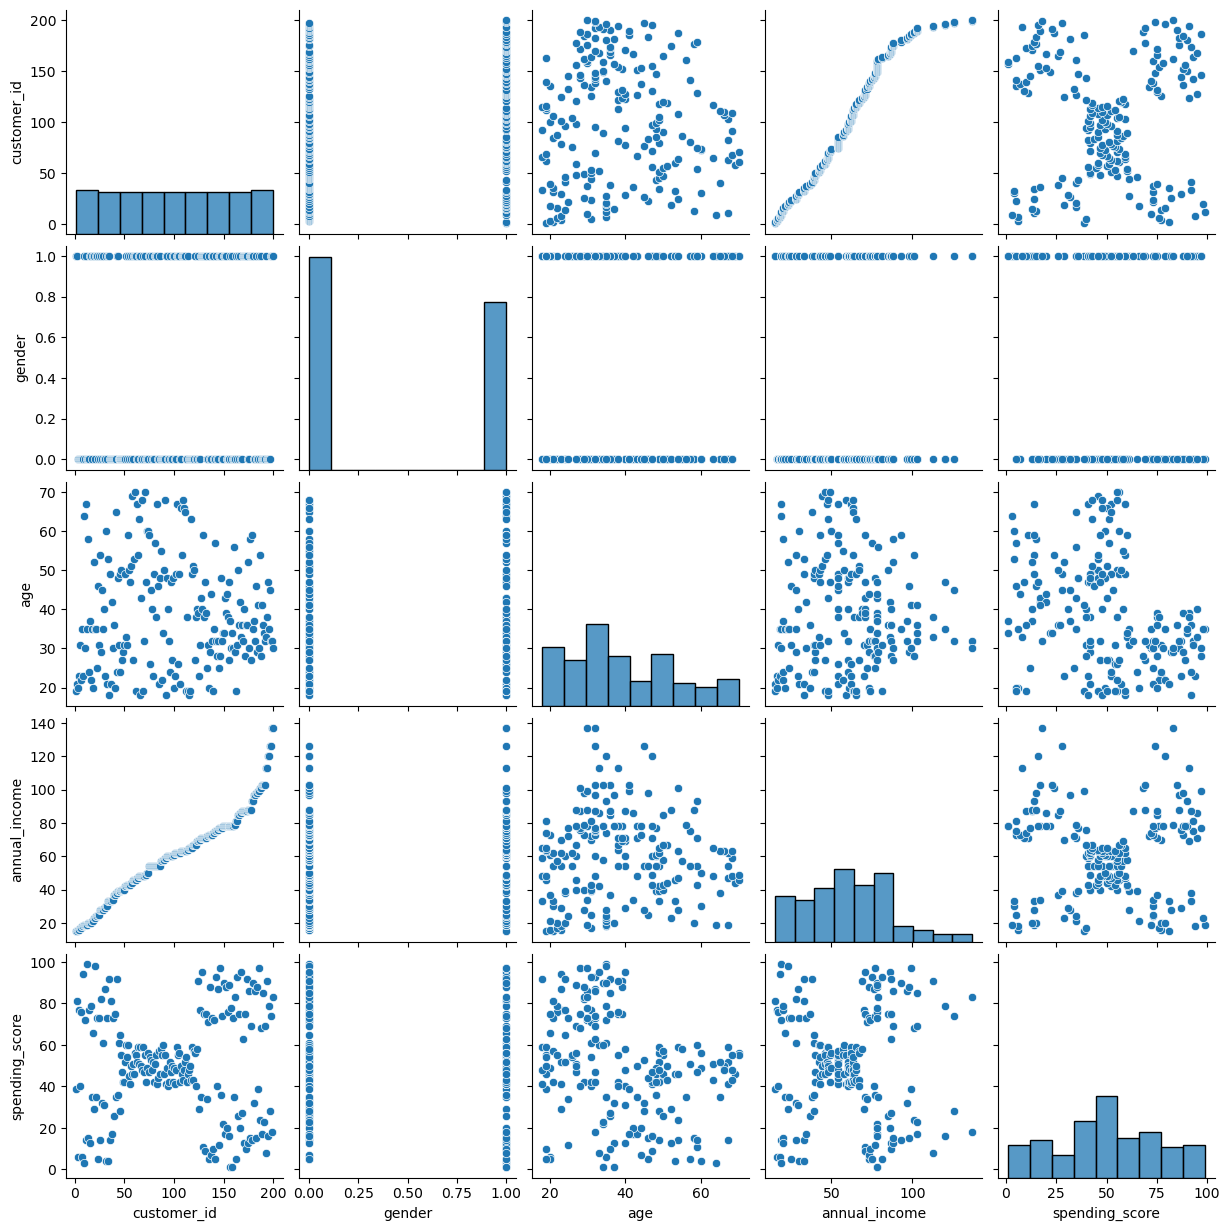

In [16]:
sns.pairplot(data=df);

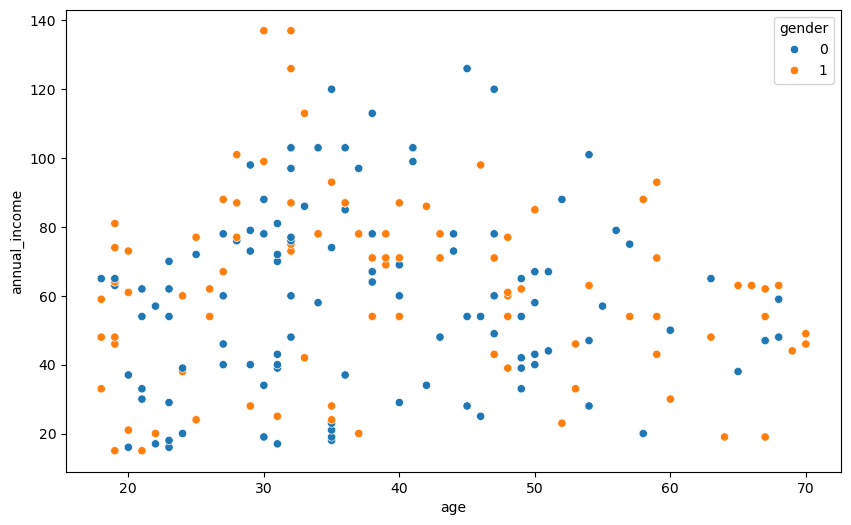

In [17]:
sns.scatterplot(x= df['age'], y= df['annual_income'], hue='gender', data=df);

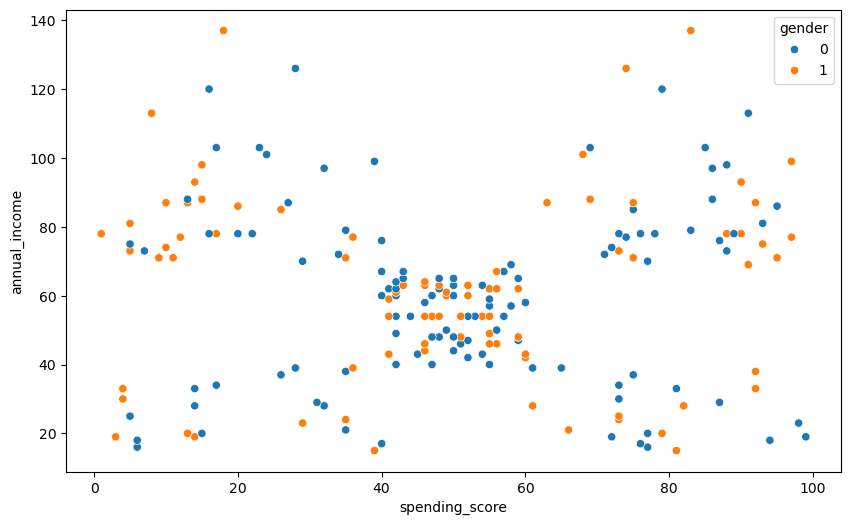

In [18]:
sns.scatterplot(x= df['spending_score'], y= df['annual_income'], hue='gender', data=df);

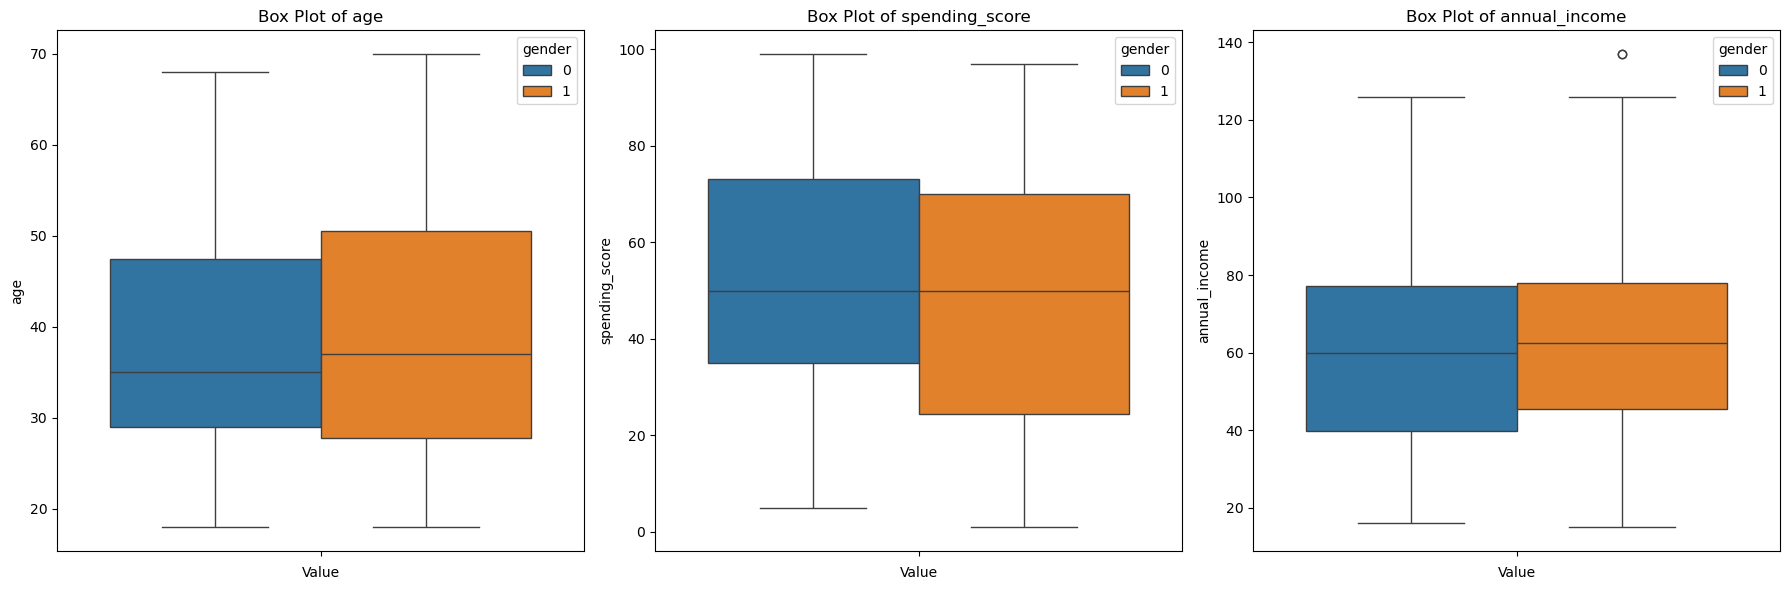

In [19]:
specific_columns = ["age", "spending_score", "annual_income"]

plt.figure(figsize=(18, 6))

for i, col in enumerate(specific_columns, 1):
    plt.subplot(1, len(specific_columns), i)
    sns.boxplot(y=col, data=df, hue="gender")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

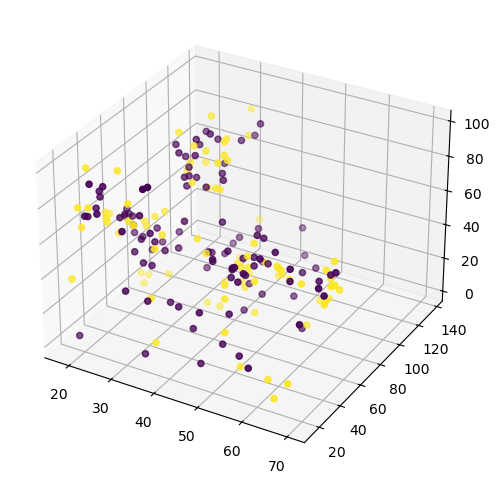

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['annual_income'], df['spending_score'], c=df['gender'])
plt.show()

In [21]:
import plotly.express as px

fig = px.scatter_3d(x=df['age'], y=df['annual_income'], 
                    z=df['spending_score'], color=df["gender"])
fig.show()

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Scaling</b>
</h2>

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["age"] = scaler.fit_transform(df[["age"]])
df["annual_income"] = scaler.fit_transform(df[["annual_income"]])
df["spending_score"] = scaler.fit_transform(df[["spending_score"]])

In [23]:
df.head()

customer_id  gender    age  annual_income  spending_score
0            1       1 -1.425         -1.739          -0.435
1            2       1 -1.281         -1.739           1.196
2            3       0 -1.353         -1.701          -1.716
3            4       0 -1.138         -1.701           1.040
4            5       0 -0.563         -1.663          -0.396

In [24]:
df.drop(columns='customer_id', axis=1, inplace=True)

In [25]:
X = df.copy()

In [26]:
df.to_csv("clean.csv", index = False)

<h1 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>K_Means Clustering</b>
</h1>

In [27]:
X = pd.read_csv("clean.csv")

In [28]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=61)

In [29]:
K_means_model.fit_predict(df)

array([2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 2, 4,
       1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 2,
       1, 4, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Hopkins Test</b>
</h2>

In [30]:
from sklearn.neighbors import BallTree  
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

hopkins(df, df.shape[0])

0.30742739104066813

In [31]:
hopkins(X, 60) 

0.2885449776880893

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Elbow Method</b>
</h2>

In [32]:
ssd = []    

K = range(2,10)  

for k in K:                                          
    model = KMeans(n_clusters =k, random_state=61)
    model.fit(X)
    ssd.append(model.inertia_)

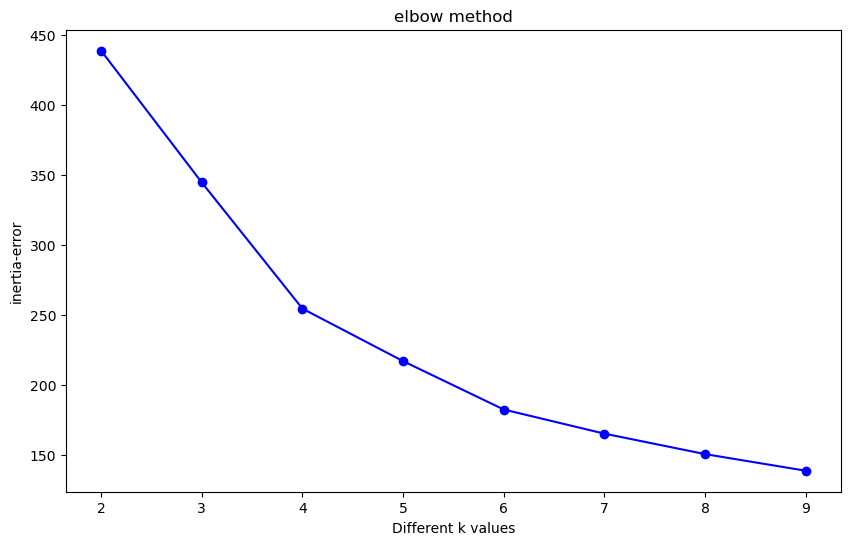

In [33]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [34]:
ssd

[438.5224115567775,
 344.405428869535,
 254.28290726083475,
 216.7849015165104,
 182.22684470641954,
 164.9880992388366,
 150.37731882359162,
 138.50141401648264]

In [35]:
pd.Series(ssd).diff()

0       NaN
1   -94.117
2   -90.123
3   -37.498
4   -34.558
5   -17.239
6   -14.611
7   -11.876
dtype: float64

In [36]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1    NaN
2 94.117
3 90.123
4 37.498
5 34.558
6 17.239
7 14.611
8 11.876

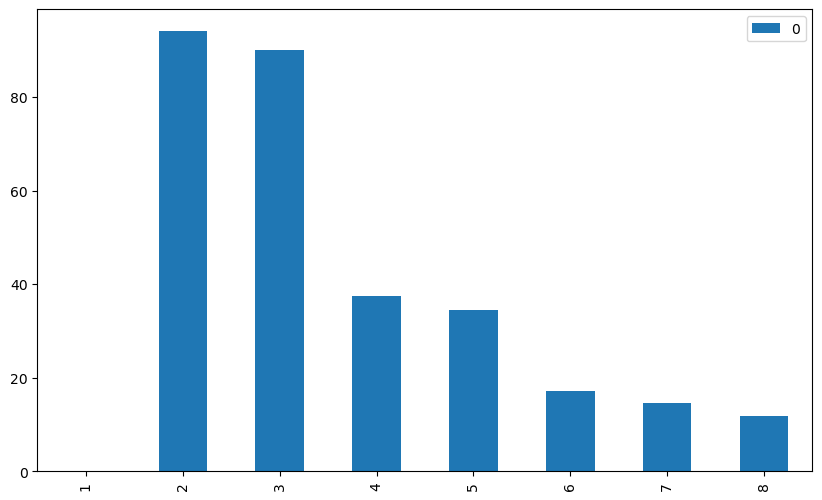

In [37]:
df_diff.plot(kind='bar');

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Yellowbrick (n_cluster selection)</b>
</h2>

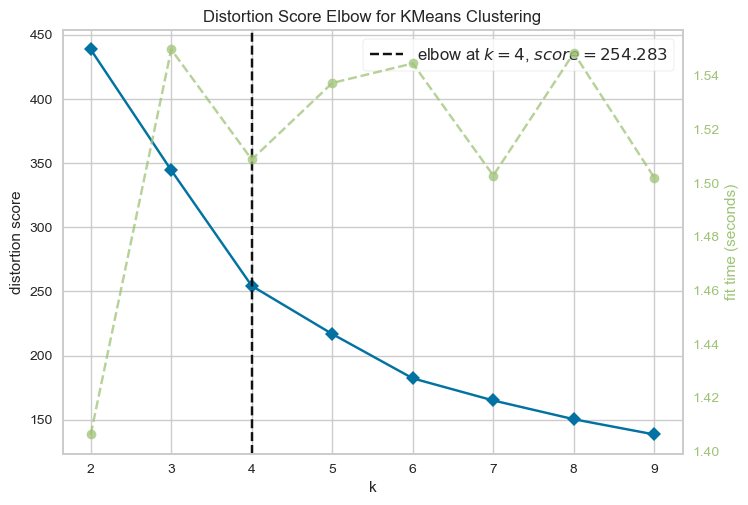

In [38]:
from yellowbrick.cluster import KElbowVisualizer 

model_ = KMeans(random_state=61)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X)       
visualizer.show();

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Silhouette Analysis</b>
</h2>

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(X, K_means_model.labels_)

0.34977050035201074

In [41]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=61)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.30319765641607577
For n_clusters=3, the silhouette score is 0.3142800845203407
For n_clusters=4, the silhouette score is 0.35027020434653977
For n_clusters=5, the silhouette score is 0.34977050035201074
For n_clusters=6, the silhouette score is 0.3570196908083302
For n_clusters=7, the silhouette score is 0.33751358748564264
For n_clusters=8, the silhouette score is 0.3360305163884344


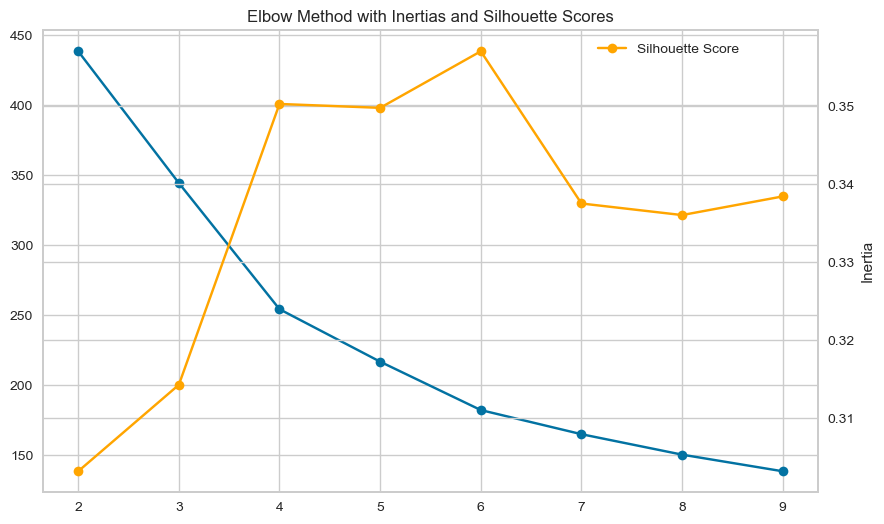

In [42]:
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=61)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(10, 6))

plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Silhouette Visualizer</b>
</h2>

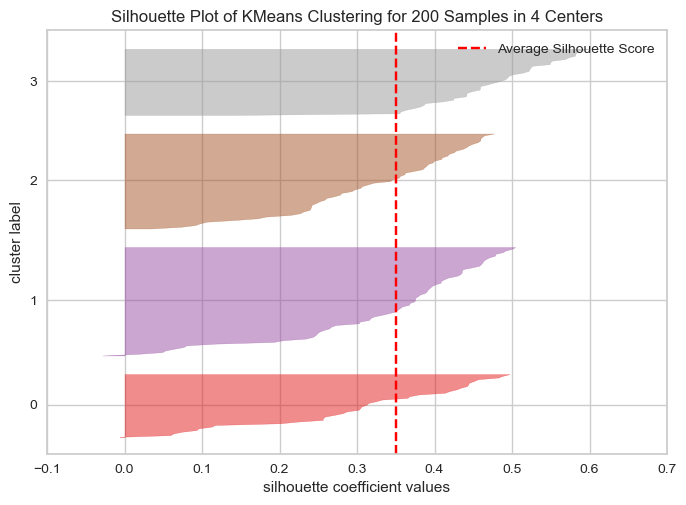

In [43]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=61)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)   
visualizer.poof();

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Building the model based on the optimal number of clusters</b>
</h2>

In [61]:
model = KMeans(n_clusters =4, random_state=61)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [62]:
model.labels_ 

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [63]:
clusters = model.labels_

In [64]:
X.head()

gender    age  annual_income  spending_score  predicted_clusters
0       1 -1.425         -1.739          -0.435                   0
1       1 -1.281         -1.739           1.196                   0
2       0 -1.353         -1.701          -1.716                   0
3       0 -1.138         -1.701           1.040                   0
4       0 -0.563         -1.663          -0.396                   0

In [65]:
X["predicted_clusters"] = clusters

In [66]:
X

gender    age  annual_income  spending_score  predicted_clusters
0         1 -1.425         -1.739          -0.435                   0
1         1 -1.281         -1.739           1.196                   0
2         0 -1.353         -1.701          -1.716                   0
3         0 -1.138         -1.701           1.040                   0
4         0 -0.563         -1.663          -0.396                   0
..      ...    ...            ...             ...                 ...
195       0 -0.276          2.269           1.118                   3
196       0  0.441          2.498          -0.862                   1
197       1 -0.492          2.498           0.924                   3
198       1 -0.492          2.918          -1.250                   1
199       1 -0.635          2.918           1.273                   3

[200 rows x 5 columns]

<h1 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Hierchical Clustering</b>
</h1>

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
hc_ward = linkage (y= X, method ="ward") 
hc_complete = linkage (X, "complete") 
hc_average = linkage (X, "average")
hc_single= linkage(X ,"single")

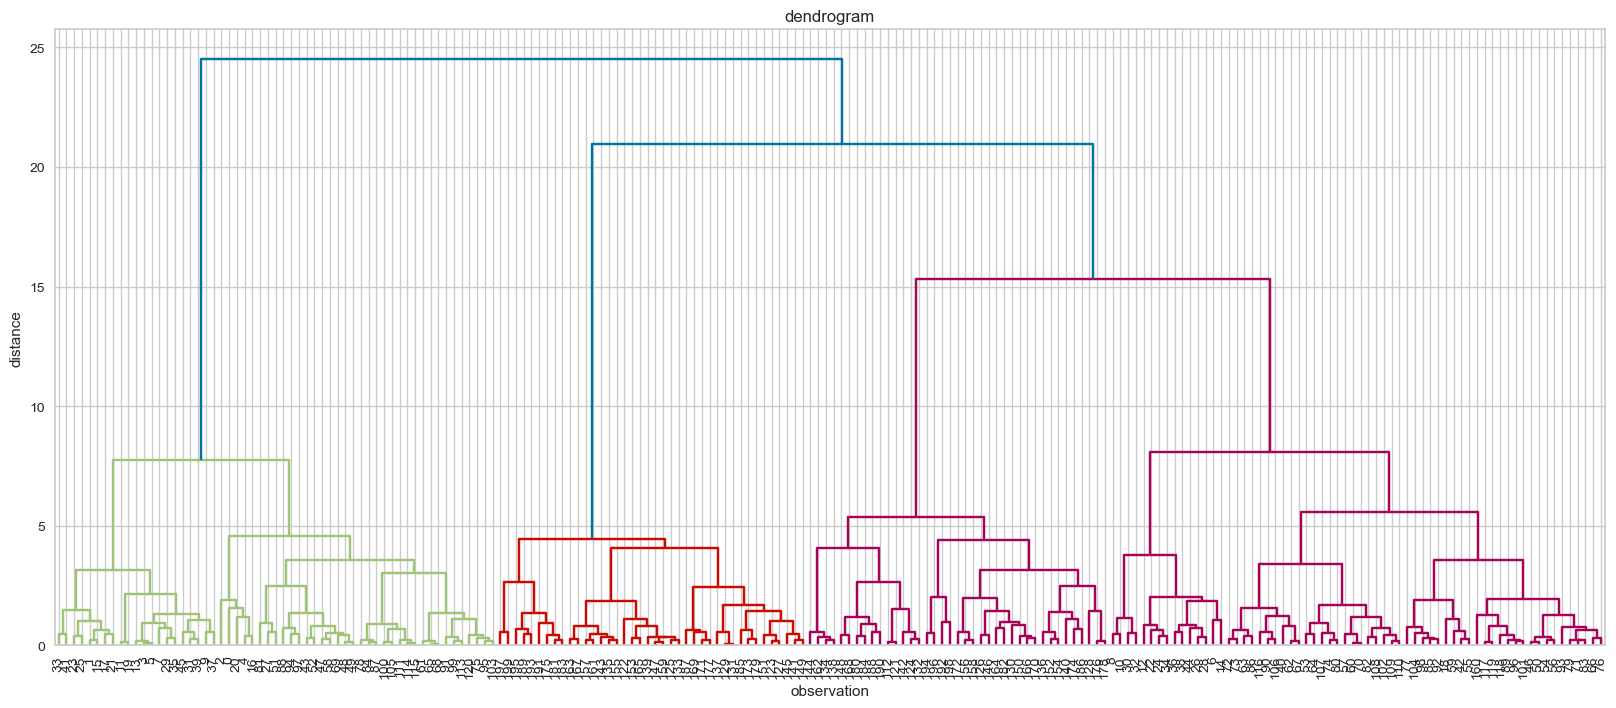

In [69]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

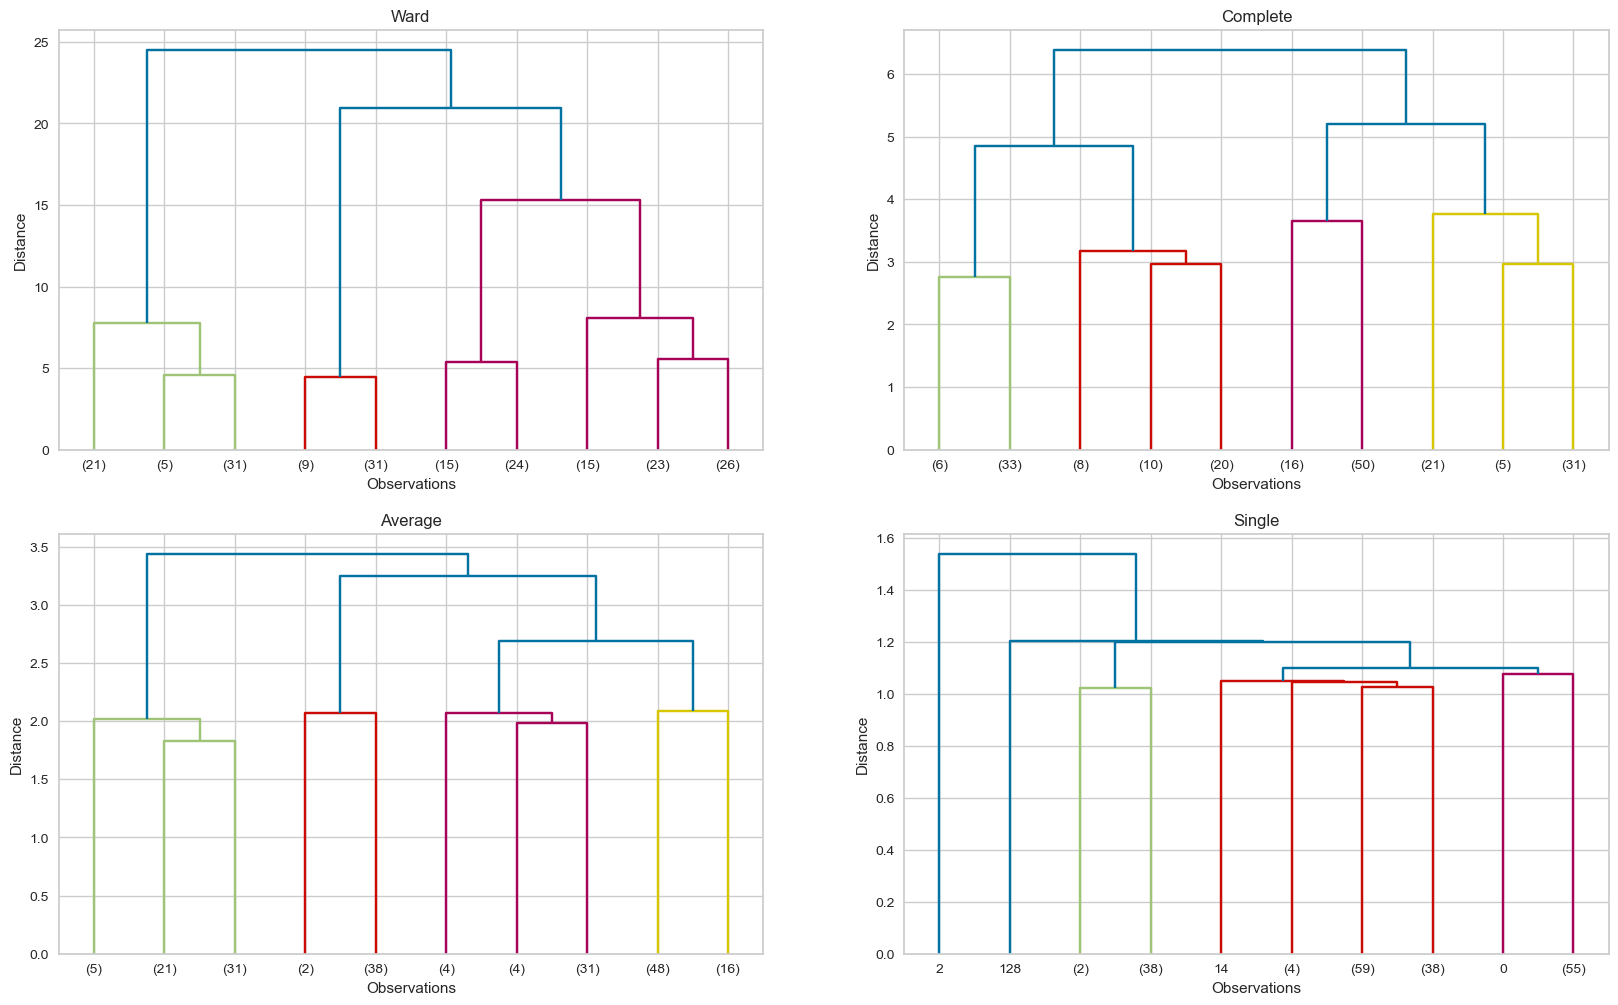

In [70]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Aglomerative Clustering</b>
</h2>

In [71]:
from sklearn.cluster import AgglomerativeClustering

<h2 style="background-color: darkviolet; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Silhoutte Score</b>
</h2>

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.34725033383802206}
f'Silhouette Score for {3} clusters {0.4279166635987036}
f'Silhouette Score for {4} clusters {0.4621244019913914}
f'Silhouette Score for {5} clusters {0.4396210261044554}
f'Silhouette Score for {6} clusters {0.3989052396284161}
f'Silhouette Score for {7} clusters {0.3567705187809869}
f'Silhouette Score for {8} clusters {0.34138536617246923}
f'Silhouette Score for {9} clusters {0.3494395396194134}


In [74]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)
df["cluster"] = clusters
df["cluster"] 

0      0
1      2
2      0
3      2
4      0
      ..
195    3
196    1
197    3
198    1
199    3
Name: cluster, Length: 200, dtype: int64

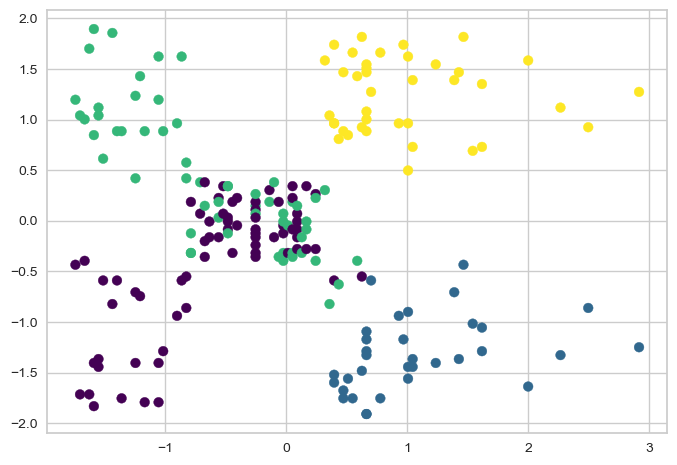

In [75]:
plt.scatter(df["annual_income"], df["spending_score"], c = clusters, cmap = "viridis");

In [76]:
clus_pred = df.groupby("cluster").mean().T
clus_pred

cluster             0      1      2      3
gender          0.457  0.545  0.345  0.462
age             0.926  0.187 -0.927 -0.442
annual_income  -0.574  1.089 -0.593  0.992
spending_score -0.400 -1.321  0.401  1.240

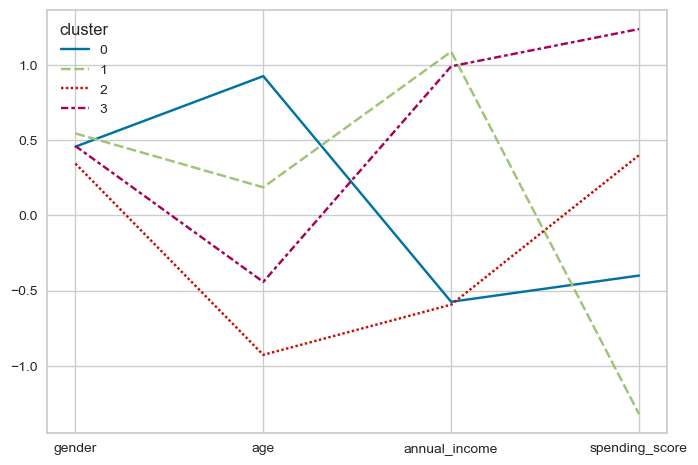

In [77]:
sns.lineplot(data = clus_pred); 

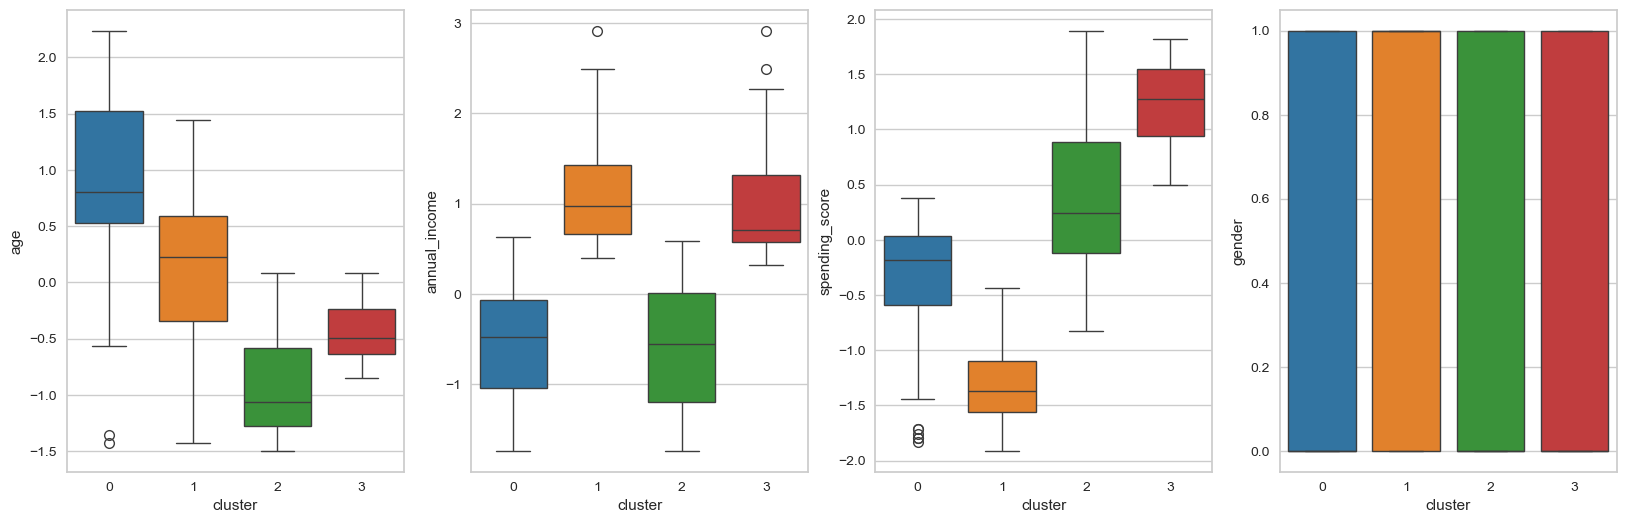

In [81]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "age", x = "cluster", data = df, palette='tab10')

plt.subplot(142)
sns.boxplot(y = "annual_income", x = "cluster", data = df, palette='tab10')

plt.subplot(143)
sns.boxplot(y = "spending_score", x = "cluster", data = df, palette='tab10')

plt.subplot(144)
sns.boxplot(y = "gender", x = "cluster", data = df, palette='tab10');

In [82]:
df2=df[["age","spending_score"]]
df2.head(2)

age  spending_score
0 -1.425          -0.435
1 -1.281           1.196

In [85]:
K_means_model = KMeans(n_clusters=4, random_state=61)
K_means_model.fit_predict(df2)

array([2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1])